In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rasterio
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
import gdown
import geopandas as gpd

In [3]:
!gdown -q 1ffCHEEL3lWiCrb-J-6pqw9uuU40AFADN
#^K13_lidar_20201109_cc.tif
!gdown -q 1Ueco26pr-UEjvU1byvjZC7clmdIbm2lh
#^K13_lidar_20210513_cc.tif

!gdown -q 1RZylWk8ok5EqQEvVUvAEVHV-A2WL8srx
#^K13_sfm_20201109_cc.tif
!gdown -q 1dbj0kEsb5LWqOspQnWKUHRCl_5p4rpe_
#^K13_sfm_20210208_cc.tif
!gdown -q 1nVFMcC4FN2NejME3IFUKpy3pcCuNgF2A
#^K13_sfm_20210406_cc.tif
!gdown -q 1iuL43K2KJ_4F38eDprDWSotV8Qy6DFLO
#^K13_sfm_20210513_cc.tif

!gdown -q 1NxZ5GjWQ_XGKTohoI2aXtEOcD7S9Ee97
#^K13_lidar_20210604_cc.tif
!gdown -q 1dbMqydCYRGUx_TO5IeLlVgkyxg-fyUKU
#^K13_lidar_20210913_cc.tif

!gdown -q 1pxw2Iuqlh-HuvyTVHx7lw5nUXswPhRhc
#^K13_sfm_20210604_cc.tif
!gdown -q 1fGu58buemDeh6Vxz0984KSfshsP2aRYP
#^K13_sfm_20210819_cc.tif
!gdown -q 1q_mG_Dmb1pRymwXNiCGdDbV3jw9wrT-u
#^K13_sfm_20210913_cc.tif


!gdown -q 1zZP17z0SDcH_gg4KQfkWbpKD5aMhhJ42
#^KID13_UTM.shp
!gdown -q 1BveiJqwrCkBkkkdoPlCUSM5gcJvxOntJ
#^KID13_UTM.cpg
!gdown -q 13Cy9snTvMq3usPDHh2gaHQCmM4Umjrms
#^KID13_UTM.dbf
!gdown -q 19_lE5aWV-Q6YreF4qDgJYMB4A83sv6fQ
#^KID13_UTM.prj
!gdown -q 1mQSL_b4JX_ZJ0nDIuK3x4jjT7ei1-72j
#^KID13_UTM.shx
    
# !gdown -q 1eTq6dxCuD-OmftNLelCc9yZ2-EK_kO2c
# #^KID13_mask.shp
# !gdown -q 1hdaX9AxPGAIdGN_uGElTjcNTaKT-Qp-0
# #^KID13_mask.cpg
# !gdown -q 1SYGY6aNfjpq7cZNCIsi5x7Es_JO_NJTP
# #^KID13_mask.dbf
# !gdown -q 1Dn4EBZxCEhdB0JtfUd4pNSKXLFyTr7T0
# #^KID13_mask.prj
# !gdown -q 1E9KZM7gCI8dEEXEUXpArNvNh_dFHqJY6
# #^KID13_mask.shx

^C


In [3]:
# Wet season, year 1; LiDAR
K13_20201109_LiDAR = 'K13_lidar_20201109_cc.tif'
K13_20210513_LiDAR = 'K13_lidar_20210513_cc.tif'
# Wet season, year 1; sfm
K13_20201109_sfm = 'K13_sfm_20201109_cc.tif'
K13_20210208_sfm = 'K13_sfm_20210208_cc.tif'
K13_20210406_sfm = 'K13_sfm_20210406_cc.tif'
K13_20210513_sfm = 'K13_sfm_20210513_cc.tif'

# Dry season, year 1; LiDAR
K13_20210604_LiDAR = 'K13_lidar_20210604_cc.tif'
K13_20210913_LiDAR = 'K13_lidar_20210913_cc.tif'
# Dry season, year 1; sfm
K13_20210604_sfm = 'K13_sfm_20210604_cc.tif'
K13_20210819_sfm = 'K13_sfm_20210819_cc_2.tif'
K13_20210913_sfm = 'K13_sfm_20210913_cc.tif'

In [4]:
# Open datasets
# Wet season, year 1; LiDAR
K13_20201109_LiDAR_full = rioxarray.open_rasterio(K13_20201109_LiDAR).squeeze()
K13_20210513_LiDAR_full = rioxarray.open_rasterio(K13_20210513_LiDAR).squeeze()
# Wet season, year 1; sfm
K13_20201109_sfm_full = rioxarray.open_rasterio(K13_20201109_sfm).squeeze()
K13_20210208_sfm_full = rioxarray.open_rasterio(K13_20210208_sfm).squeeze()
K13_20210406_sfm_full = rioxarray.open_rasterio(K13_20210406_sfm).squeeze()
K13_20210513_sfm_full = rioxarray.open_rasterio(K13_20210513_sfm).squeeze()

# Dry season, year 1; LiDAR
K13_20210604_LiDAR_full = rioxarray.open_rasterio(K13_20210604_LiDAR).squeeze()
K13_20210913_LiDAR_full = rioxarray.open_rasterio(K13_20210913_LiDAR).squeeze()
# Dry season, year 1; sfm
K13_20210604_sfm_full = rioxarray.open_rasterio(K13_20210604_sfm).squeeze()
K13_20210819_sfm_full = rioxarray.open_rasterio(K13_20210819_sfm).squeeze()
K13_20210913_sfm_full = rioxarray.open_rasterio(K13_20210913_sfm).squeeze()

In [5]:
# Set nodata value
# Wet season, year 1; LiDAR
K13_20201109_LiDAR_full.rio.write_nodata(-9999, inplace=True)
K13_20210513_LiDAR_full.rio.write_nodata(-9999, inplace=True)
# Wet season, year 1; sfm
K13_20201109_sfm_full.rio.write_nodata(-9999, inplace=True)
K13_20210208_sfm_full.rio.write_nodata(-9999, inplace=True)
K13_20210406_sfm_full.rio.write_nodata(-9999, inplace=True)
K13_20210513_sfm_full.rio.write_nodata(-9999, inplace=True)

# Dry season, year 1; LiDAR
K13_20210604_LiDAR_full.rio.write_nodata(-9999, inplace=True)
K13_20210913_LiDAR_full.rio.write_nodata(-9999, inplace=True)
# Dry season, year 1; sfm
K13_20210604_sfm_full.rio.write_nodata(-9999, inplace=True)
K13_20210819_sfm_full.rio.write_nodata(-9999, inplace=True)
K13_20210913_sfm_full.rio.write_nodata(-9999, inplace=True)

<xarray.DataArray (y: 9192, x: 3967)>
[36464664 values with dtype=float64]
Coordinates:
    band         int32 1
  * x            (x) float64 4.982e+03 4.982e+03 ... 5.022e+03 5.022e+03
  * y            (y) float64 5.099e+03 5.099e+03 ... 5.007e+03 5.007e+03
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    -9999.0

In [6]:
mask_path = './K13_mask.shp'

# grab shapefile crs to write to rasters
crs = gpd.read_file(mask_path).crs
mask_gdf = gpd.read_file(mask_path)

In [7]:
# Wet season, year 1; LiDAR
K13_20201109_LiDAR_full.rio.write_crs(crs, inplace=True)
K13_20210513_LiDAR_full.rio.write_crs(crs, inplace=True)
# Wet season, year 1; sfm
K13_20201109_sfm_full.rio.write_crs(crs, inplace=True)
K13_20210208_sfm_full.rio.write_crs(crs, inplace=True)
K13_20210406_sfm_full.rio.write_crs(crs, inplace=True)
K13_20210513_sfm_full.rio.write_crs(crs, inplace=True)

# Dry season, year 1; LiDAR
K13_20210604_LiDAR_full.rio.write_crs(crs, inplace=True)
K13_20210913_LiDAR_full.rio.write_crs(crs, inplace=True)
# Dry season, year 1; sfm
K13_20210604_sfm_full.rio.write_crs(crs, inplace=True)
K13_20210819_sfm_full.rio.write_crs(crs, inplace=True)
K13_20210913_sfm_full.rio.write_crs(crs, inplace=True)

<xarray.DataArray (y: 9192, x: 3967)>
[36464664 values with dtype=float64]
Coordinates:
    band         int32 1
  * x            (x) float64 4.982e+03 4.982e+03 ... 5.022e+03 5.022e+03
  * y            (y) float64 5.099e+03 5.099e+03 ... 5.007e+03 5.007e+03
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    -9999.0

In [8]:
#clipping using rioxarray
# Wet season, year 1; LiDAR
K13_20201109_LiDAR_clipped = K13_20201109_LiDAR_full.rio.clip(mask_gdf.geometry)
K13_20210513_LiDAR_clipped = K13_20210513_LiDAR_full.rio.clip(mask_gdf.geometry)
K13_20210513_LiDAR_reproj = K13_20210513_LiDAR_clipped.rio.reproject_match(K13_20201109_LiDAR_clipped, resampling=3)
K13_20201109_LiDAR_clipped.rio.to_raster('20201109_KID13_LiDAR.tif')
K13_20210513_LiDAR_reproj.rio.to_raster('20210513_KID13_LiDAR.tif')

# Wet season, year 1; sfm
K13_20201109_sfm_clipped = K13_20201109_sfm_full.rio.clip(mask_gdf.geometry)
K13_20210208_sfm_clipped = K13_20210208_sfm_full.rio.clip(mask_gdf.geometry)
K13_20210406_sfm_clipped = K13_20210406_sfm_full.rio.clip(mask_gdf.geometry)
K13_20210513_sfm_clipped = K13_20210513_sfm_full.rio.clip(mask_gdf.geometry)
K13_20210208_sfm_reproj = K13_20210208_sfm_clipped.rio.reproject_match(K13_20201109_sfm_clipped, resampling=3)
K13_20210406_sfm_reproj = K13_20210406_sfm_clipped.rio.reproject_match(K13_20201109_sfm_clipped, resampling=3)
K13_20210513_sfm_reproj = K13_20210513_sfm_clipped.rio.reproject_match(K13_20201109_sfm_clipped, resampling=3)
K13_20201109_sfm_clipped.rio.to_raster('20201109_KID13_sfm.tif')
K13_20210208_sfm_reproj.rio.to_raster('20210208_KID13_sfm.tif')
K13_20210406_sfm_reproj.rio.to_raster('20210406_KID13_sfm.tif')
K13_20210513_sfm_reproj.rio.to_raster('20210513_KID13_sfm.tif')

# Dry season, year 1; LiDAR
K13_20210604_LiDAR_clipped = K13_20210604_LiDAR_full.rio.clip(mask_gdf.geometry)
K13_20210913_LiDAR_clipped = K13_20210913_LiDAR_full.rio.clip(mask_gdf.geometry)
K13_20210913_LiDAR_reproj = K13_20210913_LiDAR_clipped.rio.reproject_match(K13_20210604_LiDAR_clipped, resampling=3)
K13_20210604_LiDAR_clipped.rio.to_raster('20210604_KID13_LiDAR.tif')
K13_20210913_LiDAR_reproj.rio.to_raster('20210913_KID13_LiDAR.tif')

# Dry season, year 1; sfm
K13_20210604_sfm_clipped = K13_20210604_sfm_full.rio.clip(mask_gdf.geometry)
K13_20210819_sfm_clipped = K13_20210819_sfm_full.rio.clip(mask_gdf.geometry)
K13_20210913_sfm_clipped = K13_20210913_sfm_full.rio.clip(mask_gdf.geometry)
K13_20210819_sfm_reproj = K13_20210819_sfm_clipped.rio.reproject_match(K13_20210604_sfm_clipped, resampling=3)
K13_20210913_sfm_reproj = K13_20210913_sfm_clipped.rio.reproject_match(K13_20210604_sfm_clipped, resampling=3)
K13_20210604_sfm_clipped.rio.to_raster('20210604_KID13_sfm.tif')
K13_20210819_sfm_reproj.rio.to_raster('20210819_KID13_sfm.tif')
K13_20210913_sfm_reproj.rio.to_raster('20210913_KID13_sfm.tif')

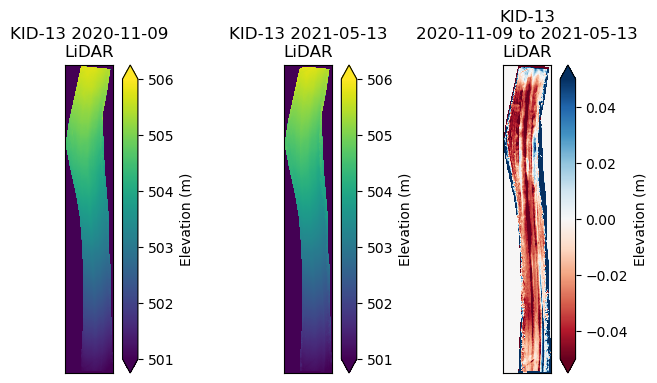

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(8,4))

m0 = ax[0].imshow(K13_20201109_LiDAR_clipped, cmap = 'viridis', vmin=501, vmax=506)
ax[0].set_title('KID-13 2020-11-09\nLiDAR')
fig.colorbar(m0, label='Elevation (m)', extend='both', ax=ax[0])
ax[0].set_facecolor('k')
ax[0].set_xticks(())
ax[0].set_yticks(());

m1 = ax[1].imshow(K13_20210513_LiDAR_clipped, cmap = 'viridis', vmin=501, vmax=506)
ax[1].set_title('KID-13 2021-05-13\nLiDAR')
fig.colorbar(m1, label='Elevation (m)', extend='both', ax=ax[1])
ax[1].set_facecolor('k')
ax[1].set_xticks(())
ax[1].set_yticks(());

diff = K13_20210513_LiDAR_reproj-K13_20201109_LiDAR_clipped
m2 = ax[2].imshow(diff, cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[2].set_title('KID-13\n2020-11-09 to 2021-05-13\nLiDAR')
fig.colorbar(m2, label='Elevation (m)', extend='both', ax=ax[2])
ax[2].set_facecolor('k')
ax[2].set_xticks(())
ax[2].set_yticks(());

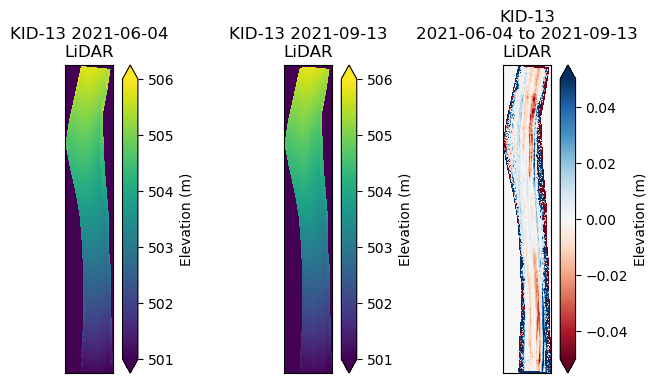

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(8,4))

m0 = ax[0].imshow(K13_20210604_LiDAR_clipped, cmap = 'viridis', vmin=501, vmax=506)
ax[0].set_title('KID-13 2021-06-04\nLiDAR')
fig.colorbar(m0, label='Elevation (m)', extend='both', ax=ax[0])
ax[0].set_facecolor('k')
ax[0].set_xticks(())
ax[0].set_yticks(());

m1 = ax[1].imshow(K13_20210513_LiDAR_clipped, cmap = 'viridis', vmin=501, vmax=506)
ax[1].set_title('KID-13 2021-09-13\nLiDAR')
fig.colorbar(m1, label='Elevation (m)', extend='both', ax=ax[1])
ax[1].set_facecolor('k')
ax[1].set_xticks(())
ax[1].set_yticks(());

diff = K13_20210913_LiDAR_reproj-K13_20210604_LiDAR_clipped
m2 = ax[2].imshow(diff, cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[2].set_title('KID-13\n2021-06-04 to 2021-09-13\nLiDAR')
fig.colorbar(m2, label='Elevation (m)', extend='both', ax=ax[2])
ax[2].set_facecolor('k')
ax[2].set_xticks(())
ax[2].set_yticks(());

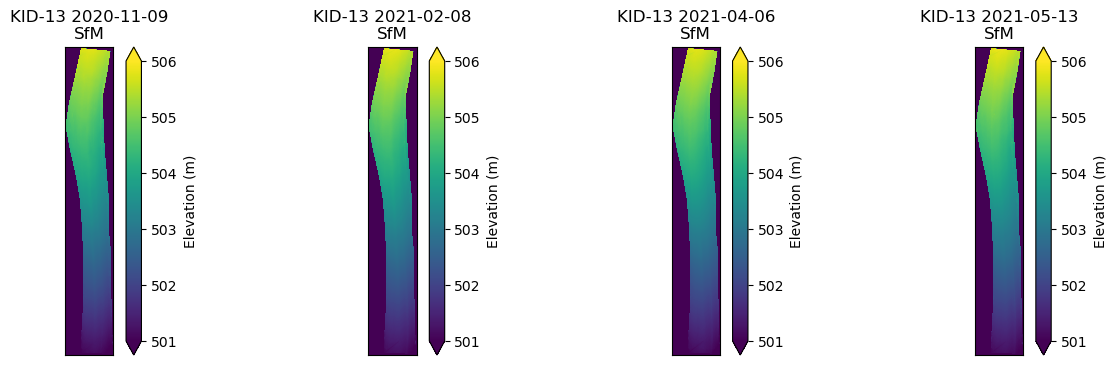

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))

m0 = ax[0].imshow(K13_20201109_sfm_clipped, cmap = 'viridis', vmin=501, vmax=506)
ax[0].set_title('KID-13 2020-11-09\nSfM')
fig.colorbar(m0, label='Elevation (m)', extend='both', ax=ax[0])
ax[0].set_facecolor('k')
ax[0].set_xticks(())
ax[0].set_yticks(());

m1 = ax[1].imshow(K13_20210208_sfm_reproj, cmap = 'viridis', vmin=501, vmax=506)
ax[1].set_title('KID-13 2021-02-08\nSfM')
fig.colorbar(m1, label='Elevation (m)', extend='both', ax=ax[1])
ax[1].set_facecolor('k')
ax[1].set_xticks(())
ax[1].set_yticks(());

m2 = ax[2].imshow(K13_20210406_sfm_reproj, cmap = 'viridis', vmin=501, vmax=506)
ax[2].set_title('KID-13 2021-04-06\nSfM')
fig.colorbar(m2, label='Elevation (m)', extend='both', ax=ax[2])
ax[2].set_facecolor('k')
ax[2].set_xticks(())
ax[2].set_yticks(());

m3 = ax[3].imshow(K13_20210513_sfm_reproj, cmap = 'viridis', vmin=501, vmax=506)
ax[3].set_title('KID-13 2021-05-13\nSfM')
fig.colorbar(m3, label='Elevation (m)', extend='both', ax=ax[3])
ax[3].set_facecolor('k')
ax[3].set_xticks(())
ax[3].set_yticks(());

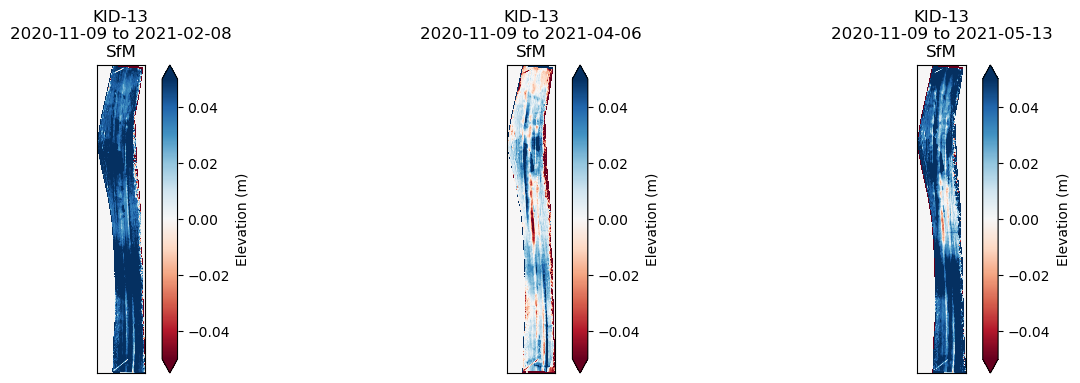

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

m0 = ax[0].imshow(K13_20210208_sfm_reproj-K13_20201109_sfm_clipped, cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[0].set_title('KID-13\n2020-11-09 to 2021-02-08\nSfM')
fig.colorbar(m0, label='Elevation (m)', extend='both', ax=ax[0])
ax[0].set_facecolor('k')
ax[0].set_xticks(())
ax[0].set_yticks(());

m1 = ax[1].imshow(K13_20210406_sfm_reproj-K13_20201109_sfm_clipped, cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[1].set_title('KID-13\n2020-11-09 to 2021-04-06\nSfM')
fig.colorbar(m1, label='Elevation (m)', extend='both', ax=ax[1])
ax[1].set_facecolor('k')
ax[1].set_xticks(())
ax[1].set_yticks(());

m2 = ax[2].imshow(K13_20210513_sfm_reproj-K13_20201109_sfm_clipped, cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[2].set_title('KID-13\n2020-11-09 to 2021-05-13\nSfM')
fig.colorbar(m2, label='Elevation (m)', extend='both', ax=ax[2])
ax[2].set_facecolor('k')
ax[2].set_xticks(())
ax[2].set_yticks(());